In [1]:
import pandas as pd
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
df.shape

(8555, 3)

In [5]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
from sklearn import preprocessing

In [7]:
label_encoder = preprocessing.LabelEncoder()

In [8]:
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [9]:
df['Gender'].unique()

array([1, 0])

In [10]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

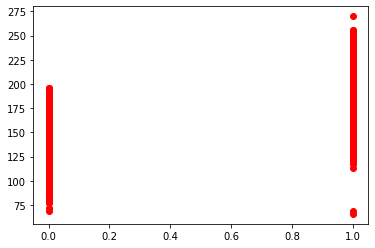

In [12]:
plt.scatter(df['Gender'],df['Weight'],color='red')

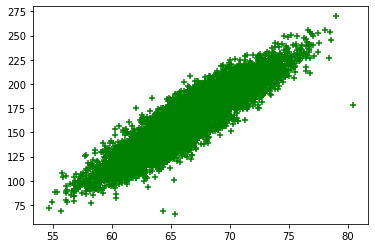

In [13]:
plt.scatter(df['Height'],df['Weight'],color='green',marker='+')

In [14]:
X = df[['Gender','Height']]
y = df['Weight']

In [15]:
X

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [16]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [19]:
len(X_train)

5988

In [20]:
len(X_test)

2567

In [21]:
X_train

,Gender,Height
3586,1,63.631231
4613,1,67.839590
7789,0,61.233904
1452,1,74.053846
793,1,71.206619
...,...,...
2832,1,67.500067
729,1,67.429854
3824,1,71.448881
6626,0,62.276683


In [22]:
X_test

,Gender,Height
8316,0,65.324870
1807,1,66.675607
7720,0,66.538965
3378,1,63.529634
4853,1,65.941119
...,...,...
6950,0,64.014586
3597,1,68.916314
3222,1,69.026501
3980,1,66.407946


In [23]:
y_train

3586    158.685877
4613    169.459306
7789    103.142561
1452    207.728204
793     193.743260
           ...    
2832    175.879804
729     175.124366
3824    210.204479
6626    130.090964
2470    148.906905
Name: Weight, Length: 5988, dtype: float64

In [ ]:
y_test

In [24]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [25]:
clf.fit(X_train, y_train)

LinearRegression()

In [26]:
X_test

,Gender,Height
8316,0,65.324870
1807,1,66.675607
7720,0,66.538965
3378,1,63.529634
4853,1,65.941119
...,...,...
6950,0,64.014586
3597,1,68.916314
3222,1,69.026501
3980,1,66.407946


In [27]:
clf.predict(X_test)

array([145.41920374, 172.90538869, 152.63573829, ..., 186.87901416,
       171.31442016,  96.75260347])

In [28]:
p_value = clf.predict(X_test)

In [29]:
print(p_value)

[145.41920374 172.90538869 152.63573829 ... 186.87901416 171.31442016
  96.75260347]


In [30]:
y_test

8316    145.521061
1807    183.438337
7720    164.092435
3378    156.789293
4853    181.069176
           ...    
6950    136.703387
3597    213.143154
3222    180.702751
3980    181.901814
8051     99.108499
Name: Weight, Length: 2567, dtype: float64

In [31]:
clf.score(X_test,y_test)

0.9038177891879864

## So Accuracy is 90%

In [ ]:
#slope
m = clf.coef_

#intercept
c = clf.intercept_

In [32]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,p_value)

In [33]:
print(MAE)  #The Result of MAE

7.995684412925984


In [36]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,p_value)

In [35]:
print(MSE) #The Result of MSE

99.42810989648729


## Accuracy = 90%, MAE = 7.8,  MSE = 97.56

## Using K-NN Algorithm

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
KNN = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='kd_tree',leaf_size=30,p=2,metric='minkowski',n_jobs=-1)

In [39]:
KNN.fit(X_train,y_train)

<class 'ValueError'>: Unknown label type: 'continuous'